In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Merging 12 months of data into a single file

In [3]:
import os

files = [file for file in os.listdir('./CSV Files')]

merged_data = pd.DataFrame()

for file in files:
    print(file)
    df = pd.read_csv("./CSV Files/"+file)
    merged_data = pd.concat([merged_data, df])

Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [4]:
merged_data.shape

(186850, 6)

In [5]:
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [6]:
df = merged_data.copy()

## 1. What was the best month for sales? How much was earned that month?

In [7]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [8]:
df["Month"] = df["Order Date"].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [9]:
df['Month'].value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Or      355
Name: Month, dtype: int64

In [10]:
row_index = df[df["Order Date"].str[0:2] == 'Or'].index

In [11]:
row_index

Int64Index([  254,   705,  1101,  2875,  3708,  3793,  3812,  4218,  5143,
             5293,
            ...
             6018,  7727,  8251,  8906,  8918, 10443, 10784, 10813, 11047,
            13304],
           dtype='int64', length=355)

In [12]:
df.drop(row_index, inplace = True)

In [13]:
df["Month"].value_counts()

12    24680
10    19973
04    17984
11    17282
05    16284
03    14888
07    14032
06    13292
02    11726
08    11719
09    11375
01     9500
Name: Month, dtype: int64

In [14]:
df.isna().sum()

Order ID            536
Product             536
Quantity Ordered    536
Price Each          536
Order Date          536
Purchase Address    536
Month               536
dtype: int64

<AxesSubplot: >

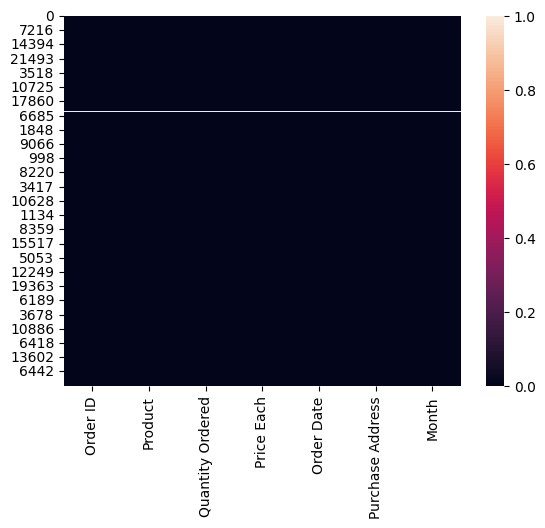

In [15]:
sns.heatmap(df.isnull())

In [16]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
12567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12640,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df = df.dropna(how = "all")
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [18]:
df["Month"] = df["Month"].astype('int32')

In [19]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [25]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])
df["Total Sales"] = df["Quantity Ordered"] * df["Price Each"]

In [26]:
df[df["Quantity Ordered"] == 2]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001",12,23.90
10,295675,USB-C Charging Cable,2,11.95,12/13/19 13:52,"594 1st St, San Francisco, CA 94016",12,23.90
12,295677,AA Batteries (4-pack),2,3.84,12/20/19 19:19,"866 Pine St, Boston, MA 02215",12,7.68
13,295678,AAA Batteries (4-pack),2,2.99,12/06/19 09:38,"187 Lincoln St, Dallas, TX 75001",12,5.98
30,295692,AA Batteries (4-pack),2,3.84,12/14/19 01:21,"640 Cherry St, Los Angeles, CA 90001",12,7.68
...,...,...,...,...,...,...,...,...
13563,222856,AAA Batteries (4-pack),2,2.99,06/03/19 13:53,"164 Johnson St, San Francisco, CA 94016",6,5.98
13564,222857,AA Batteries (4-pack),2,3.84,06/20/19 16:09,"36 West St, Atlanta, GA 30301",6,7.68
13568,222861,Wired Headphones,2,11.99,06/26/19 22:16,"606 Pine St, Portland, OR 97035",6,23.98
13579,222870,AA Batteries (4-pack),2,3.84,06/01/19 08:47,"697 Forest St, Dallas, TX 75001",6,7.68


In [30]:
aggregate = df.groupby("Month").sum()[["Quantity Ordered", "Total Sales"]]

Text(0, 0.5, 'Sales in USD * 10^6')

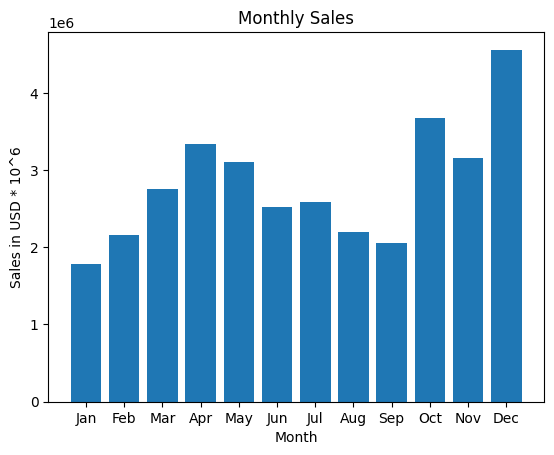

In [32]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.bar(months, aggregate["Total Sales"])
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales in USD * 10^6")

## What city sold the most product?

In [38]:
# Need to extract the city from the Purchase Address

df["City"] = df["Purchase Address"].apply(lambda x: x.split(',')[1])

In [39]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


In [40]:
sentence = "Hi there, My name is Sai Phani Ram, I am a Grad Student"
splitted = sentence.split(',')
splitted

['Hi there', ' My name is Sai Phani Ram', ' I am a Grad Student']

In [41]:
df["City"].value_counts()

 San Francisco    43948
 Los Angeles      29107
 New York City    24456
 Boston           19575
 Atlanta          14616
 Dallas           14571
 Seattle          14487
 Portland         12261
 Austin            9714
Name: City, dtype: int64

In [43]:
type(df["City"])

pandas.core.series.Series

In [59]:
df["City"] = df["Purchase Address"].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")

In [60]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,State
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston (MA),Boston (MA)
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City (NY),New York City (NY)
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco (CA),San Francisco (CA)
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco (CA),San Francisco (CA)
13621,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta (GA),Atlanta (GA)


In [62]:
# Notice there are a few overlapping cities 
# Portland (OR) and Portland(ME)

df["City"].value_counts()

 San Francisco (CA)    43948
 Los Angeles (CA)      29107
 New York City (NY)    24456
 Boston (MA)           19575
 Atlanta (GA)          14616
 Dallas (TX)           14571
 Seattle (WA)          14487
 Portland (OR)          9846
 Austin (TX)            9714
 Portland (ME)          2415
Name: City, dtype: int64

In [63]:
df.drop(columns = ["State"], axis = 1, inplace = True)

In [64]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [65]:
# Which city sold the most products?

city_wise_agg = df.groupby("City").sum()

In [66]:
city_wise_agg

,Quantity Ordered,Price Each,Month,Total Sales
City,,,,
Atlanta (GA),16304,2726247.35,103160,2741642.05
Austin (TX),10933,1777231.68,68570,1786745.52
Boston (MA),22123,3580075.00,138632,3604080.86
Dallas (TX),16453,2702619.12,102976,2717793.72
Los Angeles (CA),32722,5323915.79,204933,5354039.93
New York City (NY),27470,4553287.23,172980,4581658.91
Portland (ME),2696,441701.73,16889,444110.53
Portland (OR),11110,1822878.38,69540,1832538.71
San Francisco (CA),49363,8074045.54,310174,8124120.94


Text(0.5, 1.0, 'Sales w.r.t each city')

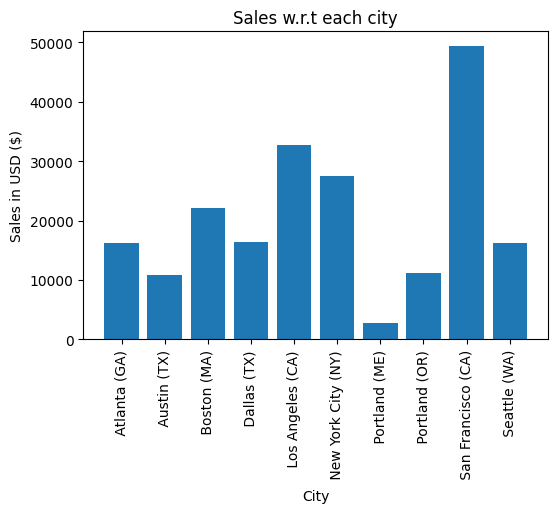

In [76]:
plt.figure(figsize=(6, 4))
plt.bar(city_wise_agg.index, city_wise_agg["Quantity Ordered"])
plt.xticks(city_wise_agg.index, rotation = "vertical")
plt.xlabel("City")
plt.ylabel("Sales in USD ($)")
plt.title("Sales w.r.t each city")

### What time should we display advertisements to maximize the likelihood of customer’s buying product?

In [77]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [78]:
# To handle Datetime: We convert the Order Date Object into a Datatime column

df["Order Date"] = pd.to_datetime(df["Order Date"])

In [79]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [82]:
df['Hour'] = df["Order Date"].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [88]:
hourly_agg = df.groupby('Hour').count()
hourly_agg

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Minute
Hour,,,,,,,,,,
0,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844
1,2313,2313,2313,2313,2313,2313,2313,2313,2313,2313
2,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227
3,816,816,816,816,816,816,816,816,816,816
4,843,843,843,843,843,843,843,843,843,843
5,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293
6,2445,2445,2445,2445,2445,2445,2445,2445,2445,2445
7,3945,3945,3945,3945,3945,3945,3945,3945,3945,3945
8,6184,6184,6184,6184,6184,6184,6184,6184,6184,6184


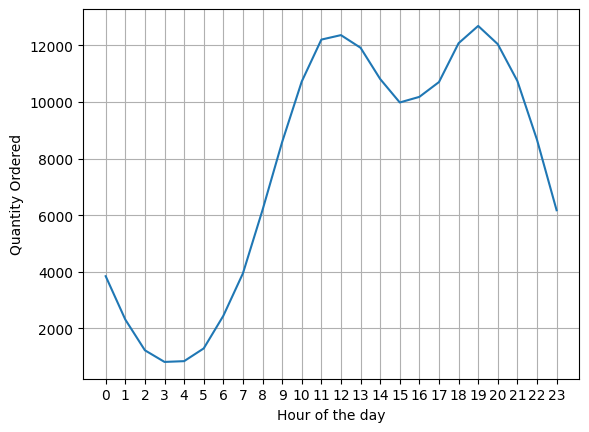

In [90]:
plt.plot(hourly_agg.index, hourly_agg["Quantity Ordered"])
plt.xticks(hourly_agg.index)
plt.xlabel("Hour of the day")
plt.ylabel('Quantity Ordered')
plt.grid()
plt.show()

- Based on the above line plot, the best time to advertise to maximize the likelihood of the purchase is just before 
the 11:00 AM or 18:00 PM

### What products are most often sold together?

- If the order ID for any given products is the same, it indicate that those products are bought together. 

In [92]:
df["Order ID"].value_counts()

160873    5
263918    4
289117    4
277875    4
235798    4
         ..
169524    1
169525    1
169526    1
169527    1
222909    1
Name: Order ID, Length: 175449, dtype: int64

In [93]:
## Create a new dataframe that contains only the duplicated IDs

df_duplicates = df[df["Order ID"].duplicated(keep=False)]
df_duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32
...,...,...,...,...,...,...,...,...,...,...,...
13592,222882,AA Batteries (4-pack),1,3.84,2019-06-18 11:37:00,"990 Walnut St, Los Angeles, CA 90001",6,3.84,Los Angeles (CA),11,37
13594,222884,Google Phone,1,600.00,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,600.00,New York City (NY),12,6
13595,222884,USB-C Charging Cable,1,11.95,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,11.95,New York City (NY),12,6
13614,222903,iPhone,1,700.00,2019-06-07 22:21:00,"685 Hickory St, New York City, NY 10001",6,700.00,New York City (NY),22,21


In [102]:
# Goal is to create a new column that contains all the products pertaining to an Order ID

df_duplicates["Grouped Products"] = df_duplicates.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

KeyError: 'Column not found: Product'

In [96]:
df_duplicates.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute,Grouped Products
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32,"Vareebadd Phone,USB-C Charging Cable"


In [99]:
df_duplicates[df_duplicates["Order ID"] == '295681']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute,Grouped Products
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."


In [100]:
df_duplicates = df_duplicates[["Order ID", "Grouped Products"]].drop_duplicates()

In [101]:
df_duplicates

,Order ID,Grouped Products
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
13570,222863,"27in FHD Monitor,Bose SoundSport Headphones"
13576,222868,"iPhone,Apple Airpods Headphones"
13591,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
13594,222884,"Google Phone,USB-C Charging Cable"


In [109]:
from itertools import combinations
from collections import Counter

counter = Counter()

for prods in df_duplicates["Grouped Products"]:
    prod_list = prods.split(',')
    # Most commonly purchased 3 products
    counter.update(Counter(combinations(prod_list, 3)))

In [110]:
counter.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 82),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 59),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 43),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 32),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 26),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 23),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  15),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  4),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 4)]

### What product sold the most? Why do you think it sold the most?

In [116]:
product_agg = df.groupby('Product').sum()

In [122]:
product_agg

quantity_ordered = df.groupby('Product').sum()['Quantity Ordered']

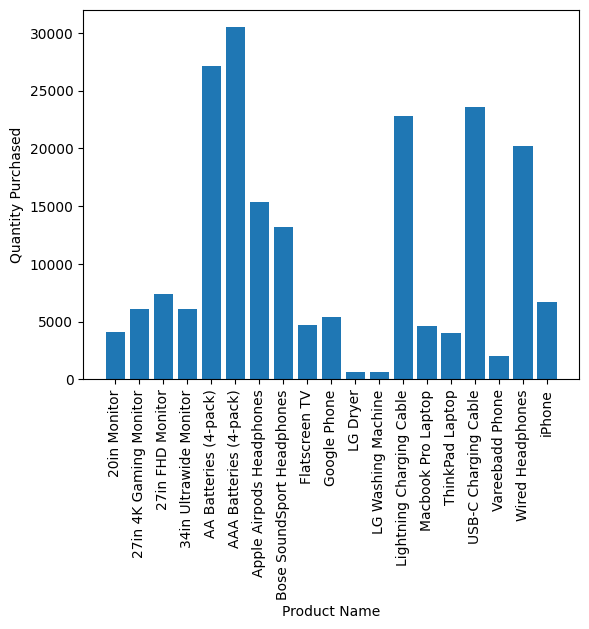

In [118]:
plt.bar(product_agg.index, product_agg['Quantity Ordered'])
plt.xticks(product_agg.index, rotation = 'vertical')
plt.xlabel('Product Name')
plt.ylabel('Quantity Purchased')
plt.show()

In [119]:
# Overlay the above bar plot with their prices

prices = df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

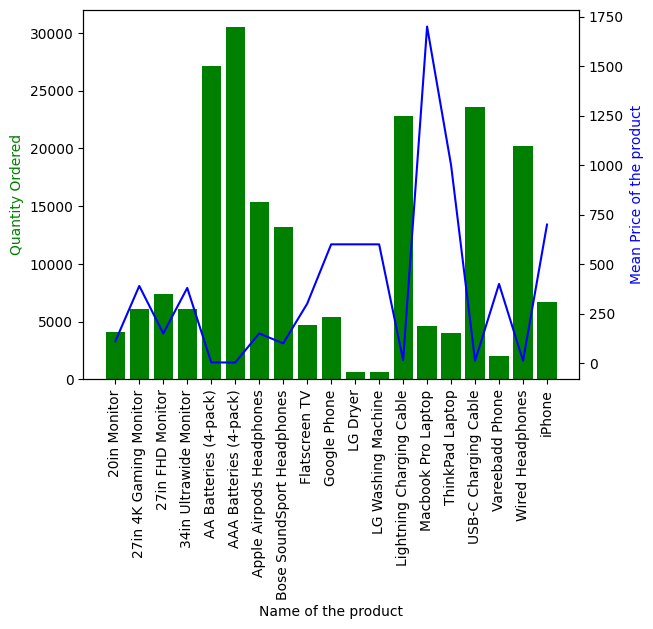

In [128]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product_agg.index, quantity_ordered, color = 'g')
ax2.plot(product_agg.index, prices, color = 'b')

ax1.set_xlabel('Name of the product')
ax1.set_xticklabels(product_agg.index, rotation = 'vertical')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Mean Price of the product', color = 'b')

plt.show()